# Setup
imports, reading CSVs, mergeing different CSVs into a mega one

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from functools import reduce
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.metrics import Metric

df1 = pd.read_csv('../input/tempfinalproj/ap_participation.csv')
headers = df1.iloc[0]
df1  = pd.DataFrame(df1.values[1:], columns=headers)

df2 = pd.read_csv('../input/tempfinalproj/ap_performance.csv')
headers = df2.iloc[0]
df2  = pd.DataFrame(df2.values[1:], columns=headers)

df3 = pd.read_csv('../input/tempfinalproj/attendance.csv')
headers = df3.iloc[0]
df3  = pd.DataFrame(df3.values[1:], columns=headers)

df4 = pd.read_csv('../input/tempfinalproj/dropout.csv')
headers = df4.iloc[0]
df4  = pd.DataFrame(df4.values[1:], columns=headers)

df5 = pd.read_csv('../input/tempfinalproj/higher_ed.csv')
headers = df5.iloc[0]
df5  = pd.DataFrame(df5.values[1:], columns=headers)

df6 = pd.read_csv('../input/tempfinalproj/ppe.csv')
headers = df6.iloc[0]
df6  = pd.DataFrame(df6.values[1:], columns=headers)

df7 = pd.read_csv('../input/tempfinalproj/salaries.csv')
headers = df7.iloc[0]
df7  = pd.DataFrame(df7.values[1:], columns=headers)


df = reduce(lambda x,y: pd.merge(x,y, on='District Code', how='outer'), [df1, df2, df3, df4, df5, df6, df7])
df

/kaggle/input/tempfinalproj/higher_ed.csv
/kaggle/input/tempfinalproj/ap_performance.csv
/kaggle/input/tempfinalproj/ppe.csv
/kaggle/input/tempfinalproj/dropout.csv
/kaggle/input/tempfinalproj/ap_participation.csv
/kaggle/input/tempfinalproj/attendance.csv
/kaggle/input/tempfinalproj/salaries.csv


,District Name_x,District Code,Tests Takers,Tests Taken_x,One Test,Two Tests,Three Tests,Four Tests,Five or More Tests,District Name_y,...,In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,District Name,Salary Totals,Average Salary,FTE Count
0,Abington,00010000,88,137,64,6,12,5,1,Abington,...,"$27,401,268.06","2,035.5","$13,461.69","$31,082,174.03","2,139.6","$14,527.10",Abington,"$11,469,788","$93,861",122.2
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,51,85,26,17,7,1,0,Academy Of the Pacific Rim Charter Public (Dis...,...,"$10,228,767.00",525.1,"$19,478.91","$10,228,767.00",525.1,"$19,478.91",NaN,NaN,NaN,NaN
2,Acton-Boxborough,06000000,493,"1,200",154,129,99,76,35,Acton-Boxborough,...,"$81,006,084.03","5,632.3","$14,382.42","$90,445,893.59","5,761.7","$15,697.78",Acton-Boxborough,"$32,945,978","$86,677",380.1
3,Adams-Cheshire,06030000,103,150,67,26,9,1,0,Adams-Cheshire,...,"$18,900,557.75","1,202.2","$15,721.64","$21,089,177.35","1,418.1","$14,871.43",Adams-Cheshire,"$6,920,007","$84,212",82.2
4,Advanced Math and Science Academy Charter (Dis...,04300000,254,490,109,73,54,17,1,Advanced Math and Science Academy Charter (Dis...,...,"$14,976,389.43",990.2,"$15,125.37","$14,976,389.43",990.2,"$15,125.37",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,NaN,03490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$1,084,616.00",64.5,"$16,815.75","$1,947,618.60",136.8,"$14,236.98",Worthington,"$376,966","$53,852",7.0
406,NaN,03500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$15,967,284.89","1,019.1","$15,668.03","$16,776,674.89","1,047.4","$16,017.45",Wrentham,"$6,138,763","$76,543",80.2
407,NaN,01480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$4,022,918.19",212.4,"$18,940.29","$4,430,123.20",237.4,"$18,661.01",NaN,NaN,NaN,NaN
408,NaN,04770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$4,634,462.97",558.5,"$8,298.05","$4,634,462.97",558.5,"$8,298.05",NaN,NaN,NaN,NaN


# Cleaning up colummn names
We fix the names of the columns so that they use underscores instead of spaces; this might make some of the things we do later become slightly easier

In [83]:
df.columns = df.columns.str.replace(" ", "_")
df

,District_Name_x,District_Code,Tests_Takers,Tests_Taken_x,One_Test,Two_Tests,Three_Tests,Four_Tests,Five_or_More_Tests,District_Name_y,...,In-District_Expenditures,Total_In-district_FTEs,In-District_Expenditures_per_Pupil,Total_Expenditures,Total_Pupil_FTEs,Total_Expenditures_per_Pupil,District_Name,Salary_Totals,Average_Salary,FTE_Count
0,Abington,00010000,88,137,64,6,12,5,1,Abington,...,"$27,401,268.06","2,035.5","$13,461.69","$31,082,174.03","2,139.6","$14,527.10",Abington,"$11,469,788","$93,861",122.2
1,Academy Of the Pacific Rim Charter Public (Dis...,04120000,51,85,26,17,7,1,0,Academy Of the Pacific Rim Charter Public (Dis...,...,"$10,228,767.00",525.1,"$19,478.91","$10,228,767.00",525.1,"$19,478.91",NaN,NaN,NaN,NaN
2,Acton-Boxborough,06000000,493,"1,200",154,129,99,76,35,Acton-Boxborough,...,"$81,006,084.03","5,632.3","$14,382.42","$90,445,893.59","5,761.7","$15,697.78",Acton-Boxborough,"$32,945,978","$86,677",380.1
3,Adams-Cheshire,06030000,103,150,67,26,9,1,0,Adams-Cheshire,...,"$18,900,557.75","1,202.2","$15,721.64","$21,089,177.35","1,418.1","$14,871.43",Adams-Cheshire,"$6,920,007","$84,212",82.2
4,Advanced Math and Science Academy Charter (Dis...,04300000,254,490,109,73,54,17,1,Advanced Math and Science Academy Charter (Dis...,...,"$14,976,389.43",990.2,"$15,125.37","$14,976,389.43",990.2,"$15,125.37",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,NaN,03490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$1,084,616.00",64.5,"$16,815.75","$1,947,618.60",136.8,"$14,236.98",Worthington,"$376,966","$53,852",7.0
406,NaN,03500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$15,967,284.89","1,019.1","$15,668.03","$16,776,674.89","1,047.4","$16,017.45",Wrentham,"$6,138,763","$76,543",80.2
407,NaN,01480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$4,022,918.19",212.4,"$18,940.29","$4,430,123.20",237.4,"$18,661.01",NaN,NaN,NaN,NaN
408,NaN,04770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"$4,634,462.97",558.5,"$8,298.05","$4,634,462.97",558.5,"$8,298.05",NaN,NaN,NaN,NaN


# Dropping unnecessary cols

In [84]:
df= df.drop(['District_Name_x', 'District_Name_y', 'District_Name'], axis = 1)

# Dropping any row that contain NaN

In [85]:
df = df.dropna()
df

,District_Code,Tests_Takers,Tests_Taken_x,One_Test,Two_Tests,Three_Tests,Four_Tests,Five_or_More_Tests,Tests_Taken_y,Score=1,...,Univ.of_Mass._(%),In-District_Expenditures,Total_In-district_FTEs,In-District_Expenditures_per_Pupil,Total_Expenditures,Total_Pupil_FTEs,Total_Expenditures_per_Pupil,Salary_Totals,Average_Salary,FTE_Count
0,00010000,88,137,64,6,12,5,1,137,11,...,8.7,"$27,401,268.06","2,035.5","$13,461.69","$31,082,174.03","2,139.6","$14,527.10","$11,469,788","$93,861",122.2
2,06000000,493,"1,200",154,129,99,76,35,"1,200",8,...,16.5,"$81,006,084.03","5,632.3","$14,382.42","$90,445,893.59","5,761.7","$15,697.78","$32,945,978","$86,677",380.1
3,06030000,103,150,67,26,9,1,0,150,44,...,0,"$18,900,557.75","1,202.2","$15,721.64","$21,089,177.35","1,418.1","$14,871.43","$6,920,007","$84,212",82.2
5,00050000,234,463,98,80,30,17,9,463,40,...,7.2,"$61,066,265.11","3,840.0","$15,902.67","$66,245,259.79","3,955.6","$16,747.21","$25,584,999","$79,828",320.5
6,00070000,99,149,52,44,3,0,0,149,10,...,22.4,"$33,209,080.50","2,122.6","$15,645.47","$37,327,984.50","2,268.4","$16,455.64","$13,515,170","$79,129",170.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,03440000,308,675,130,72,54,30,22,675,13,...,19.3,"$62,544,714.77","4,649.5","$13,451.92","$66,570,999.84","4,714.1","$14,121.68","$28,918,485","$80,240",360.4
286,03460000,163,318,72,36,47,7,1,318,111,...,15.8,"$25,850,176.79","1,987.0","$13,009.65","$27,758,470.33","2,027.6","$13,690.31","$10,834,018","$74,053",146.3
287,03470000,213,322,129,64,16,3,1,322,26,...,24.8,"$77,684,082.81","4,594.3","$16,908.80","$83,877,592.02","4,748.0","$17,665.88","$31,660,604","$85,918",368.5
288,03480000,"1,568","2,593",886,425,189,56,12,"2,593",962,...,14.2,"$361,462,448.79","25,559.2","$14,142.17","$415,444,077.55","28,713.1","$14,468.80","$151,535,395","$80,121","1,891.3"


# More data cleaning

In [86]:
df = df.replace({'\$': '', ',': '', " ":""}, regex=True)


# Converting types to float

In [87]:
temp = list(df.columns)
for i in temp:
    df[i] = df[i].astype('float')
df.dtypes

0
District_Code                         float64
Tests_Takers                          float64
Tests_Taken_x                         float64
One_Test                              float64
Two_Tests                             float64
Three_Tests                           float64
Four_Tests                            float64
Five_or_More_Tests                    float64
Tests_Taken_y                         float64
Score=1                               float64
Score=2                               float64
Score=3                               float64
Score=4                               float64
Score=5                               float64
%_Score_1-2                           float64
%_Score_3-5                           float64
Attendance_Rate                       float64
Average_#_of_Absences                 float64
Absent_10_or_more_days                float64
Chronically_Absent_(10%_or_more)      float64
Unexcused_>_9_days                    float64
#_Enrolled_Grades_09_through_12 

# More cleaning of column names

In [88]:
df.columns = df.columns.str.replace('%', 'percent')

# EDA: Visualizing the distribution of percent_Dropout_All_Grades

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


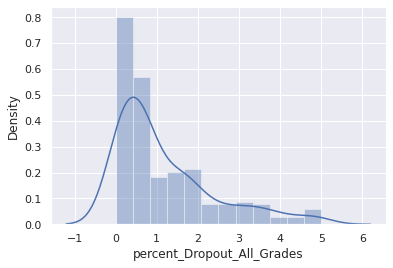

In [89]:
sns.distplot(df['percent_Dropout_All_Grades']);


# EDA: seeing correlations that exist

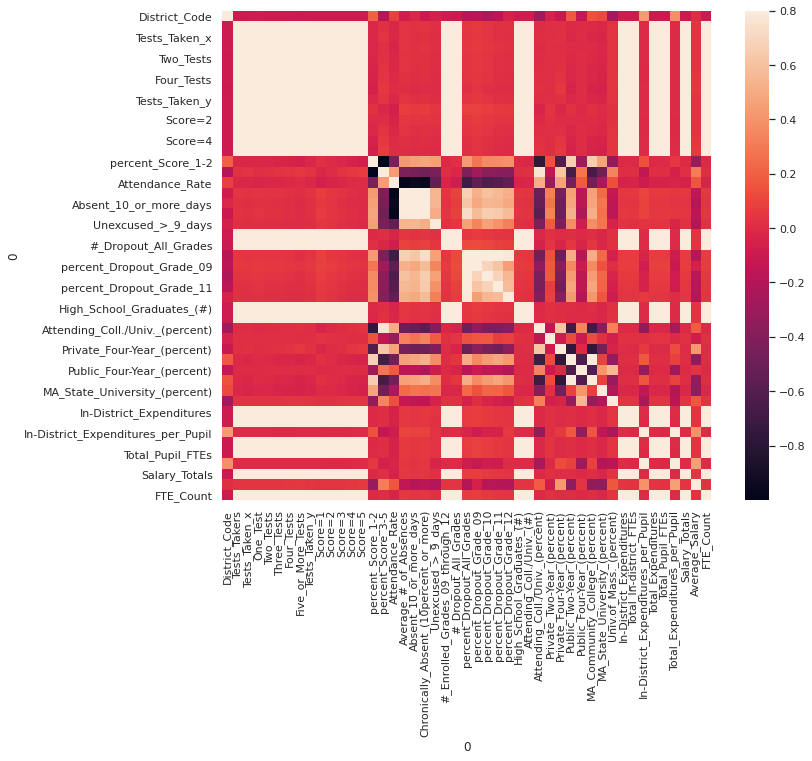

In [90]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<AxesSubplot:xlabel='0', ylabel='0'>

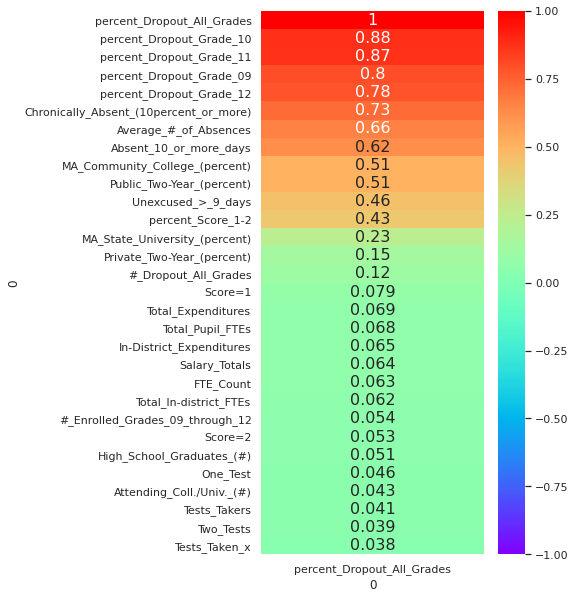

In [91]:
top_features = df.corr()[['percent_Dropout_All_Grades']].sort_values(by=['percent_Dropout_All_Grades'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

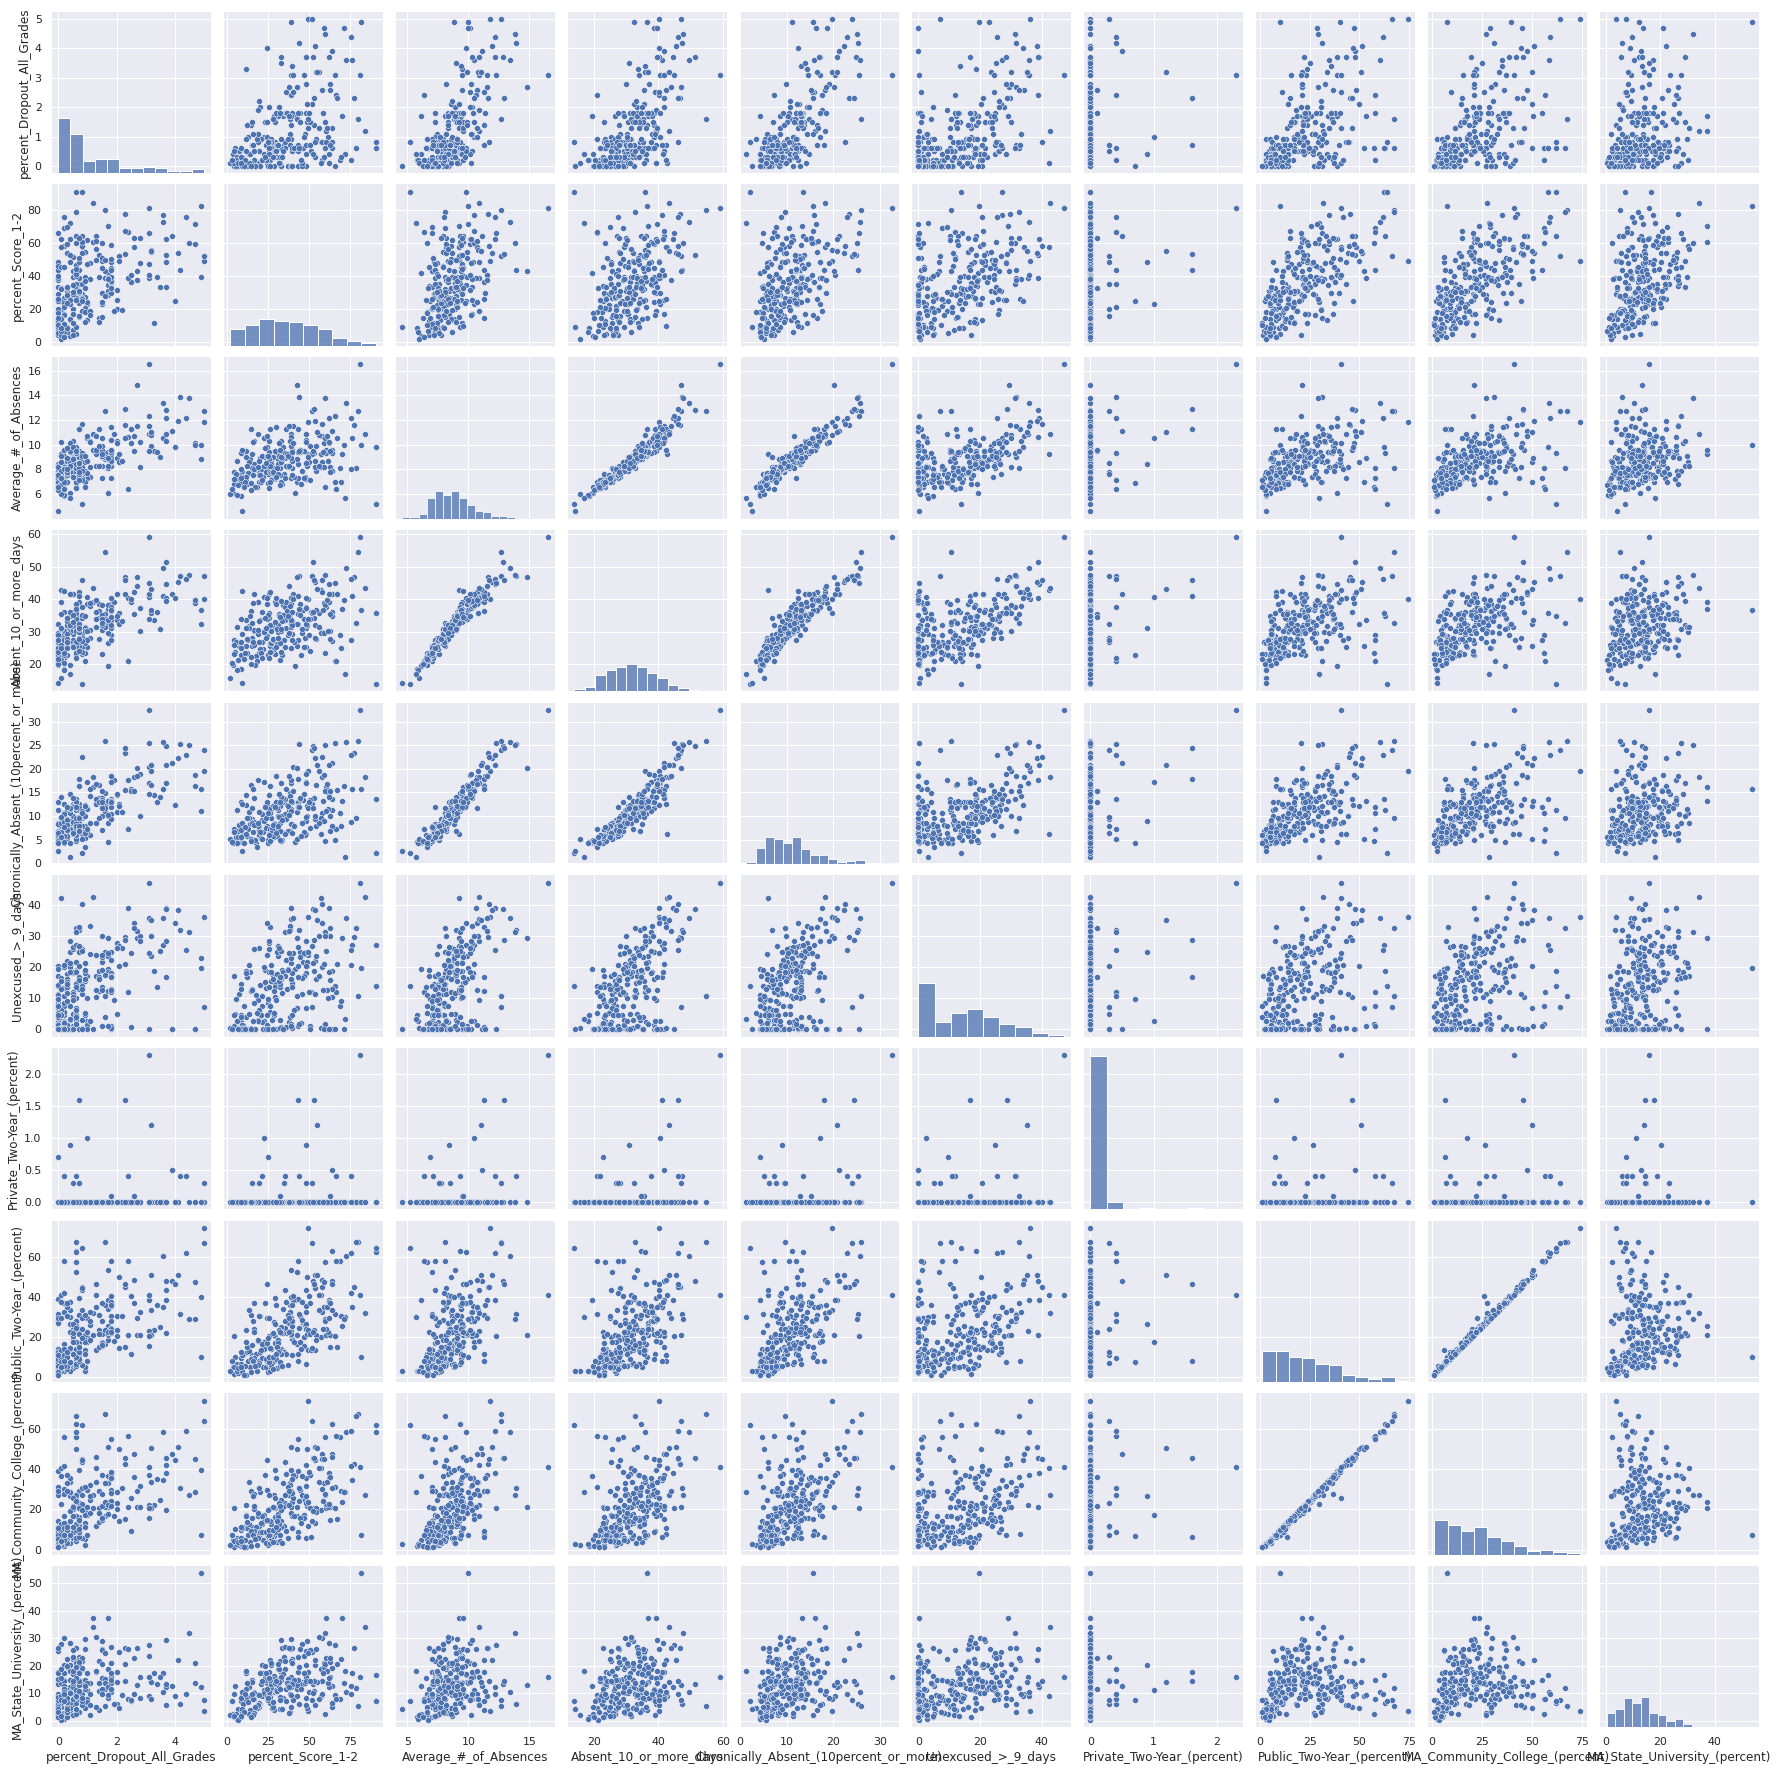

In [92]:
sns.set()
features = ['percent_Dropout_All_Grades', 'percent_Score_1-2', 'Average_#_of_Absences', 'Absent_10_or_more_days', 'Chronically_Absent_(10percent_or_more)', 'Unexcused_>_9_days', 'Private_Two-Year_(percent)', 'Public_Two-Year_(percent)', 'MA_Community_College_(percent)', 'MA_State_University_(percent)']
sns.pairplot(df[features], height = 2.5)
plt.show();

# EDA: Descriptive statistics about our target variable, percent_Dropout_All_Grades

In [93]:
df['percent_Dropout_All_Grades'].describe()

count    249.000000
mean       1.174297
std        1.206327
min        0.000000
25%        0.300000
50%        0.700000
75%        1.700000
max        5.000000
Name: percent_Dropout_All_Grades, dtype: float64

# Based on the correlation related visualizations, a few features have been selected to be the features of the models we will build.

In [94]:
features = ['percent_Score_1-2', 'Average_#_of_Absences', 'Absent_10_or_more_days', 'Chronically_Absent_(10percent_or_more)', 'Unexcused_>_9_days', 'Private_Two-Year_(percent)', 'Public_Two-Year_(percent)', 'MA_Community_College_(percent)', 'MA_State_University_(percent)']


# Setting up basics for model making.
First, we use train_test_split to split the entire dataset into training and testing data

In [95]:
y = df.percent_Dropout_All_Grades
X = df[features]

train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)



# Model 1: XGBRegressor

In [96]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 0.6406583257137782


# Model 2: SGDRegressor

In [97]:
from tensorflow.python.keras.metrics import Metric
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(train_X, train_y)

test_pred = sgd_reg.predict(test_X)
train_pred = sgd_reg.predict(train_X)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.5529623068746395
MSE: 0.6860614495586932
RMSE: 0.8282882647718083
R2 Square 0.5439646601900437
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5422150357245088
MSE: 0.5940652425323125
RMSE: 0.7707562795931749
R2 Square 0.5846500225002166
__________________________________


# Model 3: ElasticNet

In [98]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(train_X, train_y)

test_pred = model.predict(test_X)
train_pred = model.predict(train_X)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.5499333532568756
MSE: 0.6760299523650634
RMSE: 0.8222104063833438
R2 Square 0.5506327468963326
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5497294846985575
MSE: 0.5958467271093594
RMSE: 0.7719110875673179
R2 Square 0.5834044697797132
__________________________________


# Model 4: StandardScaler (Keras NN)

In [99]:
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

def model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=train_X.shape[1], activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

history = model().fit(train_X, train_y, validation_data=(test_X,test_y), epochs=200, batch_size=30)

Epoch 1/200
7/7 [==============================] - 1s 34ms/step - loss: 29.5119 - mean_absolute_error: 4.6444 - val_loss: 8.8137 - val_mean_absolute_error: 2.3237
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 7.3409 - mean_absolute_error: 2.0274 - val_loss: 1.9843 - val_mean_absolute_error: 1.0274
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 2.2956 - mean_absolute_error: 1.1514 - val_loss: 2.6825 - val_mean_absolute_error: 1.2732
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 2.7257 - mean_absolute_error: 1.2866 - val_loss: 2.0911 - val_mean_absolute_error: 1.1370
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 1.7668 - mean_absolute_error: 1.0284 - val_loss: 1.4189 - val_mean_absolute_error: 0.8949
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 1.4745 - mean_absolute_error: 0.9434 - val_loss: 1.4217 - val_mean_absolute_error: 0.8410
Epoch 7/200
7/7 [==========

# Now, we will try building the same models but with all features

In [100]:
features_nonselected = ['Tests_Takers', 'Tests_Taken_x', 'One_Test',
       'Two_Tests', 'Three_Tests', 'Four_Tests', 'Five_or_More_Tests',
       'Tests_Taken_y', 'Score=1', 'Score=2', 'Score=3', 'Score=4', 'Score=5',
       'percent_Score_1-2', 'percent_Score_3-5', 'Attendance_Rate',
       'Average_#_of_Absences', 'Absent_10_or_more_days',
       'Chronically_Absent_(10percent_or_more)', 'Unexcused_>_9_days',
       '#_Enrolled_Grades_09_through_12', '#_Dropout_All_Grades',
       'High_School_Graduates_(#)',
       'Attending_Coll./Univ._(#)', 'Attending_Coll./Univ._(percent)',
       'Private_Two-Year_(percent)', 'Private_Four-Year_(percent)',
       'Public_Two-Year_(percent)', 'Public_Four-Year_(percent)',
       'MA_Community_College_(percent)', 'MA_State_University_(percent)',
       'Univ.of_Mass._(percent)', 'In-District_Expenditures',
       'Total_In-district_FTEs', 'In-District_Expenditures_per_Pupil',
       'Total_Expenditures', 'Total_Pupil_FTEs',
       'Total_Expenditures_per_Pupil', 'Salary_Totals', 'Average_Salary',
       'FTE_Count']


In [101]:
y = df.percent_Dropout_All_Grades
X = df[features_nonselected]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)



# Model 1: XGBRegressor

In [102]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 0.3753842292353511


# Model 2: SGDRegressor

In [103]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score


sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(train_X, train_y)

test_pred = sgd_reg.predict(test_X)
train_pred = sgd_reg.predict(train_X)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

Test set evaluation:
_____________________________________
MAE: 3.289222132328759e+24
MSE: 1.6592680343923802e+49
RMSE: 4.073411388986362e+24
R2 Square -1.1398485936305059e+49
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1383392796220305e+25
MSE: 7.864632859011784e+51
RMSE: 8.868276528735323e+25
R2 Square -5.455815326709893e+51
__________________________________


# Model 3: ElasticNet

In [104]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(train_X, train_y)

test_pred = model.predict(test_X)
train_pred = model.predict(train_X)

print('Test set evaluation:\n_____________________________________')
print_evaluate(test_y, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(train_y, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.6768652007123854
MSE: 1.0225740585267147
RMSE: 1.0112240397294334
R2 Square 0.29753386533385084
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.42166824690454596
MSE: 0.32218988207786864
RMSE: 0.5676177253027505
R2 Square 0.7764919827456302
__________________________________


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.20142925933636, tolerance: 0.0268121559139785
  positive)


# Model 4: StandardScaler

In [105]:
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

def model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=train_X.shape[1], activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

history = model().fit(train_X, train_y, validation_data=(test_X,test_y), epochs=200, batch_size=30)

Epoch 1/200
7/7 [==============================] - 1s 36ms/step - loss: 12561140744192.0000 - mean_absolute_error: 1253654.2656 - val_loss: 86150864896.0000 - val_mean_absolute_error: 242030.0469
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 53213064593408.0000 - mean_absolute_error: 1127179.8984 - val_loss: 8195569664.0000 - val_mean_absolute_error: 50613.7656
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 11681045804288.0000 - mean_absolute_error: 366317.6646 - val_loss: 9458084864.0000 - val_mean_absolute_error: 74175.3750
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1186747821056.0000 - mean_absolute_error: 195220.9893 - val_loss: 6782833664.0000 - val_mean_absolute_error: 60922.2891
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 691137078272.0000 - mean_absolute_error: 157339.2988 - val_loss: 3578366464.0000 - val_mean_absolute_error: 46472.6602
Epoch 6/200
7/7 [=================

# Sources
* https://www.kaggle.com/dansbecker/xgboost
* https://www.kaggle.com/faressayah/linear-regression-house-price-prediction
* https://profiles.doe.mass.edu/state_report/